In [1]:
from auxilary.simplex import Simplex_CLASS as simplex 
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [59]:
def noisyImageTest(img, noise, alpha):
    # Convert image to float [0, 1]
    image_array = img.astype(np.float32) / 255

    noise = (noise - noise.min()) / (noise.max() - noise.min())  # Normalize to [0, 1]

    # Blend noise with original image
    image_array = (1 - alpha) * image_array + alpha * noise[..., np.newaxis]

    # Convert back to uint8 [0, 255]
    image_array = (image_array * 255).astype(np.uint8)

    return image_array


In [55]:

path = "Dataset/test/0.png"
img = cv2.imread(path)
for iter in range(20):
        simplexObj = simplex()
        img_size = (1000, 1000)
        noise = simplexObj.rand_2d_octaves(img_size, 6, 0.6)
        noisyImage = noisyImageTest(img, noise, 0.3)
        cv2.imwrite("Dataset/sample/simpleNoise/"+str(iter)+".png", noisyImage)

In [58]:
noise = (noise - noise.min()) / (noise.max() - noise.min())  # Normalize to [0, 1]

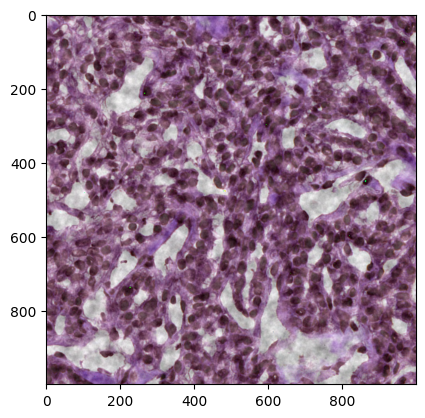

In [53]:
plt.imshow(noisyImage)

In [56]:
from opensimplex import OpenSimplex
import cv2
import numpy as np

def noisyImageTest(img, noise, alpha):
    # Convert image to float [0, 1]
    image_array = img.astype(np.float32) / 255

    # Blend noise with original image
    image_array = (1 - alpha) * image_array + alpha * noise[..., np.newaxis]

    # Convert back to uint8 [0, 255]
    image_array = (image_array * 255).astype(np.uint8)

    return image_array

def generate_noise(simplex, width, height):
    noise_array = np.zeros((height, width))
    for y in range(height):
        for x in range(width):
            noise_array[y, x] = simplex.noise2d(x, y)
    return (noise_array + 1) / 2

path = "Dataset/test/0.png"
img = cv2.imread(path)
img_size = (1000, 1000)

for iter in range(20):
    simplexObj = OpenSimplex(seed=np.random.randint(0, 10000))  # Reinitialize with a new seed
    noise = generate_noise(simplexObj, *img_size)
    noisyImage = noisyImageTest(img, noise, 0.3)
    cv2.imwrite("Dataset/sample/simpleNoise/"+str(iter)+".png", noisyImage*255)


ModuleNotFoundError: No module named 'opensimplex'


## Verifying Dataloader

In [1]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from auxilary.utils import *
from dataset import MonuSegDataSet, MonuSegValDataSet


In [8]:
def show_image(dataloader, img_type):

    for images, labels in dataloader:
        # Choose the first image in the batch
        image = images[0]

        # If the image is on the GPU, move it back to the CPU
        image = image.cpu().numpy()

        # If the image has 3 channels, transpose it to (height, width, channels)
        if image.shape[0] == 3:
            image = np.transpose(image, (1, 2, 0))
            #image = image*255
            # If the image is normalized, transform it back to the (0, 1) range
            image = unnormalize_image(image)
        else:
            image = np.transpose(image, (1, 2, 0))
            image = image*255

        

        # Plot the image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        #plt.title(f"Label: {labels[0]}")
        plt.axis('off')
        plt.show()

        print(image)

        # Break after the first batch (remove this line if you want to see more)
        break

In [9]:
def main():
    # Load config
    config = readConfig()
    train_dataset = MonuSegDataSet(config["trainDataset"])
    train_data = DataLoader(train_dataset,batch_size=config["batch_size"],shuffle=True)

    val_dataset = MonuSegValDataSet(config["valDataset"])
    val_data = DataLoader(val_dataset,batch_size=1,num_workers=4)
    
    show_image(train_data, config["input_img_type"])


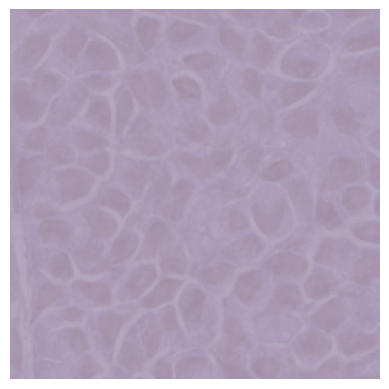

[[[0.7173361  0.6077886  0.6715255 ]
  [0.7149267  0.612588   0.6710588 ]
  [0.7143244  0.60725534 0.6705921 ]
  ...
  [0.69685656 0.59818983 0.66219217]
  [0.708301   0.60512227 0.66919214]
  [0.7173361  0.60725534 0.67525876]]

 [[0.72637117 0.6109882  0.67665875]
  [0.72275716 0.6141878  0.67525876]
  [0.7305876  0.6195204  0.6803921 ]
  ...
  [0.69083315 0.59339046 0.6598588 ]
  [0.6980612  0.6008562  0.66219217]
  [0.7155291  0.6099217  0.6733921 ]]

 [[0.7275759  0.61578757 0.6785254 ]
  [0.734804   0.6200537  0.6817921 ]
  [0.7335993  0.62538636 0.6831921 ]
  ...
  [0.6950495  0.5997896  0.6626588 ]
  [0.7034823  0.6035225  0.6668588 ]
  [0.711915   0.60725534 0.6719921 ]]

 ...

 [[0.72637117 0.61738735 0.67385876]
  [0.7215525  0.6136545  0.6747921 ]
  [0.71974546 0.60725534 0.6696588 ]
  ...
  [0.69986826 0.6008562  0.66779214]
  [0.6932425  0.59659004 0.6631255 ]
  [0.69444716 0.59552354 0.6626588 ]]

 [[0.7215525  0.6077886  0.6719921 ]
  [0.7125174  0.6019227  0.66779214]


In [11]:
main()

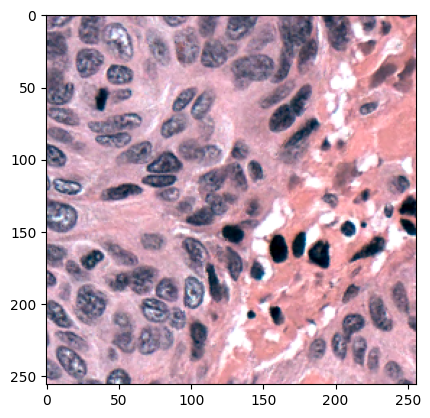

In [26]:
path = "Dataset/trainNormal/0.png"
img = cv2.imread(path)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img/255)


In [28]:
img/255

array([[[0.62745098, 0.50196078, 0.65490196],
        [0.60392157, 0.48235294, 0.62352941],
        [0.50588235, 0.41568627, 0.59215686],
        ...,
        [0.91764706, 0.6       , 0.63137255],
        [0.88235294, 0.54509804, 0.54901961],
        [0.88627451, 0.55294118, 0.56078431]],

       [[0.61176471, 0.49411765, 0.65098039],
        [0.61176471, 0.49803922, 0.61568627],
        [0.59215686, 0.49803922, 0.61176471],
        ...,
        [0.87058824, 0.54509804, 0.56078431],
        [0.87843137, 0.54509804, 0.54901961],
        [0.8745098 , 0.56862745, 0.56470588]],

       [[0.6627451 , 0.56078431, 0.70196078],
        [0.64705882, 0.5372549 , 0.67058824],
        [0.58823529, 0.49803922, 0.56470588],
        ...,
        [0.85098039, 0.5254902 , 0.5372549 ],
        [0.81960784, 0.50980392, 0.50196078],
        [0.87058824, 0.55294118, 0.54509804]],

       ...,

       [[0.99607843, 0.87058824, 0.9254902 ],
        [0.94509804, 0.77254902, 0.84705882],
        [0.83529412, 0